In [1]:
import numpy as np
import pandas as pd
from anaconda_project.internal.cli.activate import activate
from keras.src.datasets import mnist #从Keras种导入MNIST数据集
from tensorflow.python.keras.layers.pooling import Pooling2D

(X_train_image, y_train_lable), (X_test_image, y_test_lable) = mnist.load_data()

In [3]:
print("数据集张量形状:", X_train_image.shape)
print("第一个数据样本:\n", X_train_image[0])

数据集张量形状: (60000, 28, 28)
第一个数据样本:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0

In [4]:
print("第一个数据样本的标签:", y_train_lable[0])

第一个数据样本的标签: 5


In [2]:
from keras.src.utils import to_categorical
X_train = X_train_image.reshape(60000, 28, 28, 1)
X_test = X_test_image.reshape(10000, 28, 28, 1)
# 特征转换为one—hot编码
y_train = to_categorical(y_train_lable, num_classes=10)
y_test = to_categorical(y_test_lable, num_classes=10)
print("训练集张量形状:", X_train.shape)
print("第一个数据标签:", y_train[0])

训练集张量形状: (60000, 28, 28, 1)
第一个数据标签: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [3]:
from keras import models
from keras.src.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = models.Sequential() # 用顺序模型建立网络结构
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropout 层来减少神经网络训练过程中的过拟合问题
# Dropout 层会在训练过程中随机丢弃一部分神经元的输出，从而提高模型的泛化能力。
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# 编译模型
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


D:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.fit(X_train, y_train, 
          validation_split=0.3,
          epochs=5,
          batch_size=128)

Epoch 1/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.6620 - loss: 4.0356 - val_accuracy: 0.9598 - val_loss: 0.1460
Epoch 2/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9404 - loss: 0.2186 - val_accuracy: 0.9734 - val_loss: 0.0976
Epoch 3/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.9589 - loss: 0.1448 - val_accuracy: 0.9798 - val_loss: 0.0691
Epoch 4/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.9690 - loss: 0.1106 - val_accuracy: 0.9808 - val_loss: 0.0639
Epoch 5/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9722 - loss: 0.1047 - val_accuracy: 0.9842 - val_loss: 0.0596


In [5]:
score = model.evaluate(X_test, y_test)
print("测试集:", score)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9837 - loss: 0.0623
测试集: [0.052874334156513214, 0.9861999750137329]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
[4.7669540e-13 3.0380223e-10 7.0825301e-09 6.8251857e-08 8.8882959e-13
 1.6923931e-12 4.9433875e-19 9.9999988e-01 4.3164049e-12 4.0452446e-09]转换一下格式得到:7


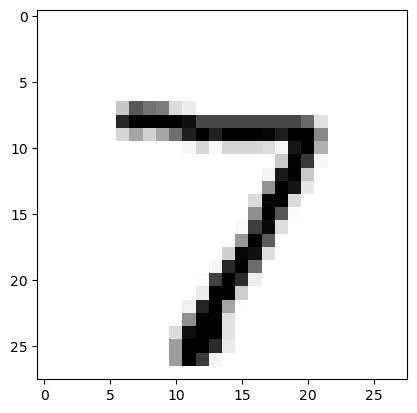

In [6]:
# 预测测试集第一个数据
pred = model.predict(X_test[0].reshape(1,28,28,1))
# 把one-hot编码转换为数字
print("{}转换一下格式得到:{}".format(pred[0], pred.argmax()))
import matplotlib.pyplot as plt
plt.imshow(X_test[0].reshape(28, 28), cmap='Greys')